In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
 
 
def raw_data():
  data = pd.read_csv('/content/iris.data',names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'iris_class'])
  data["iris_class"].replace({"Iris-setosa": 0., "Iris-virginica": 1., "Iris-versicolor": 2.}, inplace=True)
  X_train, X_test, y_train, y_test = train_test_split(data.iloc[ : , 0:-1], data.iloc[ : , -1], stratify=data['iris_class'], test_size=0.2, random_state=2020)
  return X_train, X_test, y_train, y_test
 
def prepared_data():
  X_train, X_test, y_train, y_test = raw_data()
  X_train, X_test = addbias(X_train), addbias(X_test)
  y_train, y_test = relabel_data(y_train), relabel_data(y_test)
  return X_train, X_test, y_train, y_test
 
def init_weights(shape):
  return np.zeros(shape, dtype='float64')
 
def relabel_data(y):
    label = list(set(y))
    relabeled_data = np.zeros(len(y)*len(label)).reshape(len(y),len(label))
    for i in range(len(label)):
        relabeled_data[y==label[i],i] = 1
    return relabeled_data
 
def addbias(x):
    return np.concatenate((np.ones((len(x))).reshape(-1,1), x),axis = 1)
 
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm
 
def compute_loss(y_, y):
  return -1/y.size * np.sum(y * np.log(y_) + (1 - y) * np.log(1 - y_), axis=0)
 
def gradient_dsc(X, y, y_):
  return np.dot(X.T, (y_ - y)) / y.size
 
def update_weights(w, lr, grad):
  return w - lr * grad.T
 
def mse(y_, y):
  diff = np.subtract(y_, y)
  ms = np.power(diff, 2, dtype='float64')
  return np.mean(ms)
 
def train(X_train, y_train, lr, epochs, weights): 
    for i in range(epochs): 
        xw = np.dot(X_train, weights.T)
        prob = softmax(xw)
        grad = gradient_dsc(X_train, y_train, prob)
        weights = update_weights(weights, lr, grad)
        loss = compute_loss(prob, y_train)
        loss_log.append(loss)
    return weights
 
def predict(X, weights):
    z = np.dot(X, weights.T)
    return softmax(z)
 
def predict_label(X, weights):
  a = predict(X, weights)
  # b = np.zeros_like(a)
  # b[np.arange(len(a)), a.argmax(1)] = 1
  return np.argmax(a, axis=1)
 
loss_log = []
epochs = 20000
lr = 0.01
X_train, X_test, y_train, y_test = prepared_data()
weights = init_weights((y_train.shape[1], X_train.shape[1]))
weights
weights = train(X_train, y_train, lr, epochs, weights)

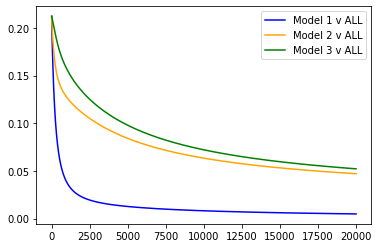

In [ ]:

loss_log = np.array(loss_log)
plt.plot(list(range(len(loss_log))), loss_log[:,0], color='Blue', label='Model 1 v ALL')
plt.plot(list(range(len(loss_log))), loss_log[:,1], color='Orange', label='Model 2 v ALL')
plt.plot(list(range(len(loss_log))), loss_log[:,2], color='Green', label='Model 3 v ALL')
plt.legend(loc='best')
plt.show()

In [ ]:
# Train multiclass classification by softmax regression and report train and test accuracy
# What method (one-vs.-one, one-vs.-all or softmax) has worked best?
from sklearn.metrics import accuracy_score
y_pred = predict_label(X_train, weights)
y_true = np.argmax(y_train, axis=1)

print("Train Accuracy : ", accuracy_score(y_true, y_pred))
y_pred = predict_label(X_test, weights)
y_true = np.argmax(y_test, axis=1)
print("Test Accuracy : ", accuracy_score(y_true, y_pred))

Train Accuracy :  0.975
Test Accuracy :  1.0
